In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,538 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

Mounted at /content/drive


In [ ]:
import pandas as pd

yuji = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/dataset_유지고객_증감여부_1006.csv',encoding='cp949',index_col=0)

In [ ]:
from pyarrow import csv

ppcd_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/ppcd_df.csv',encoding='cp949',index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
aggu = {'소분류명':lambda x : x.mode(),'뉴중분류명':lambda x : x.mode(),'대분류명':lambda x : x.mode()}
fav_cust = ppcd_df.groupby('고객번호')[['소분류명','뉴중분류명','대분류명']].agg(aggu)

In [ ]:
fav_cust[['소분류명','뉴중분류명','대분류명']] = fav_cust[['소분류명','뉴중분류명','대분류명']].astype(str)

In [ ]:
fav_cust['대분류명'].value_counts().head(10)


식품                             18746
의류/잡화                            464
기타                               103
스포츠/레저/자동차                        19
생활/건강                             15
출산유아동                             12
['식품' '의류/잡화']                     8
반려/취미/문구/도서                        6
가구/가전/전자기기                         4
['스포츠/레저/자동차' '식품' '의류/잡화']        2
Name: 대분류명, dtype: int64

In [ ]:
fav_cust['뉴중분류명'].value_counts().head(10)


농산품     4997
가공식품    4699
간식      2728
음료      1798
패션잡화    1618
과일       810
육류       703
주류       572
유제품      243
화장       183
Name: 뉴중분류명, dtype: int64

In [ ]:
fav_cust['소분류명'].value_counts().head(10)

일반흰우유     1496
유기농채소      808
재사용봉투      769
국산맥주       683
종량제봉투      639
유제품        628
일반우유       607
기초 화장품     606
청과         602
일반스낵       517
Name: 소분류명, dtype: int64

In [ ]:
new_yuji = yuji.merge(fav_cust,how='left',on='고객번호')

In [ ]:
new_yuji.head()

,고객번호,구매금액,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년4분기,14년도 구매액,15년도 구매액,연도별 구매액 증감률,14년도 상_하반기 매출 증감률,15년도 상_하반기 매출 증감률,14년도 반기 기준 증감 여부,15년도 반기 기준 증감 여부,오전/오후,총구매금액,총구매등급,평일/주말,방문횟수,방문등급,종합등급,구분,성별,연령대,매출 증감비율,유효매출증감비율,이용횟수,제휴사(최다이용),14-1,14-2,15-1,15-2,고객카테고리,14년 상반기,14년 하반기,15년 상반기,15년 하반기,증감 여부,증감,소분류명,뉴중분류명,대분류명
0,1,85042550,9141590,10783765,10781550,23334762,9302985,8595380,7806580,5295938,54041667,31000883,-23040784,14190957,-4795847,증가,감소,오후,85042550,4,평일,681,4,4,기존,M,60세이상,-0.426352,-0.426352,637,A,1,1,1,1,유지,19925355,34116312,17898365,13102518,-0.342420,감소,청과,패션잡화,식품
1,2,99880760,14123470,10199760,14841180,7080920,18481480,9310130,13842600,12001220,46245330,53635430,7390100,-2401130,-1947790,감소,감소,오후,99880760,4,평일,676,4,4,기존,M,60세이상,0.159802,0.159802,664,A,1,1,1,1,유지,24323230,21922100,27791610,25843820,0.062516,증가,유기농채소,농산품,식품
2,3,3165167,302782,548433,648188,394366,279310,312970,421017,258101,1893769,1271398,-622371,191339,86838,증가,증가,오전,3165167,1,평일,490,2,2,기존,M,60세이상,-0.328641,-0.328641,488,C,1,1,1,1,유지,851215,1042554,592280,679118,-0.202178,감소,일반소주,주류,식품
3,4,16693810,1309643,3732463,2434410,1823100,1737292,1919645,2127112,1610145,9299616,7394194,-1905422,-784596,80320,감소,증가,오후,16693810,2,평일,533,2,2,기존,F,60세이상,-0.204893,-0.204893,445,A,1,1,1,1,유지,5042106,4257510,3656937,3737257,-0.258790,감소,청과,농산품,식품
4,5,13237070,3145330,2314820,1827290,398440,2124430,810500,0,2616260,7685880,5551190,-2134690,-3234420,-318670,감소,감소,오후,13237070,2,평일,426,1,2,기존,M,60세이상,-0.277742,-0.277742,421,A,1,1,1,1,유지,5460150,2225730,2934930,2616260,-0.520845,감소,유제품,농산품,식품


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
new_yuji['연령대'] = new_yuji['연령대'].replace(['60세이상', '55세~59세', '50세~54세', '45세~49세', '40세~44세', '35세~39세', '30세~34세', '25세~29세', '20세~24세', '19세이하'],['60대','50대','50대','40대','40대','30대','30대','20대','20대','10대'])

In [ ]:
new_yuji['연령대'].unique()

array(['60대', '50대', '40대', '30대', '20대', '10대'], dtype=object)

In [ ]:
age_li = ['60대', '50대', '40대', '30대', '20대', '10대']

In [ ]:
대분류명 = []
중분류명 = []
소분류명 = []

In [ ]:
for i in age_li:
  대분류명.append(pd.DataFrame(new_yuji[(new_yuji['증감'] == '감소') & (new_yuji['연령대'] == i)]['대분류명'].value_counts()))

In [ ]:
for i in age_li:
  중분류명.append(pd.DataFrame(new_yuji[(new_yuji['증감'] == '감소') & (new_yuji['연령대'] == i)]['뉴중분류명'].value_counts()))

In [ ]:
for i in age_li:
  소분류명.append(pd.DataFrame(new_yuji[(new_yuji['증감'] == '감소') & (new_yuji['연령대'] == i)]['소분류명'].value_counts()))

In [ ]:
df = pd.DataFrame()

In [ ]:
df = pd.DataFrame()
for z in range(6):
  df = pd.concat([df,대분류명[z]],join='outer',axis=1)

df.columns = ['60대', '50대', '40대', '30대', '20대', '10대']
df.fillna(0,inplace=True)
df.astype(int)

,60대,50대,40대,30대,20대,10대
식품,547,2097,3281,1778,294,5
의류/잡화,19,61,64,37,10,0
['식품' '의류/잡화'],1,0,0,1,0,0
스포츠/레저/자동차,1,6,1,0,0,0
생활/건강,0,2,2,0,0,0
기타,0,1,2,11,15,0
출산유아동,0,0,2,3,0,0
반려/취미/문구/도서,0,0,1,1,0,0


In [ ]:
df = pd.DataFrame()

for z in range(6):
  df = pd.concat([df,중분류명[z]],join='outer',axis=1)

df.columns = ['60대', '50대', '40대', '30대', '20대', '10대']
df.fillna(0,inplace=True)
df.astype(int)

,60대,50대,40대,30대,20대,10대
농산품,225,772,818,344,30,1
가공식품,119,430,832,549,76,1
패션잡화,48,240,271,118,23,0
음료,44,129,274,215,57,0
주류,27,55,110,68,7,0
...,...,...,...,...,...,...
['농산품' '음료'],0,0,0,1,0,0
['라면/통조림/즉석밥' '음료'],0,0,0,1,0,0
아웃도어,0,0,0,1,0,0
['음료' '케어'],0,0,0,0,1,0


In [ ]:
df = pd.DataFrame()

for z in range(6):
  df = pd.concat([df,소분류명[z]],join='outer',axis=1)

df.columns = ['60대', '50대', '40대', '30대', '20대', '10대']
df.fillna(0,inplace=True)
df.astype(int)

,60대,50대,40대,30대,20대,10대
유기농채소,47,114,117,88,10,0
청과,46,98,108,48,5,0
유제품,37,79,84,60,4,0
일반흰우유,30,169,286,137,10,0
일반우유,25,64,133,55,1,1
...,...,...,...,...,...,...
면봉/화장솜,0,0,0,0,1,0
['봉지면' '스트리트'],0,0,0,0,1,0
양식기타,0,0,0,0,1,0
판초콜릿,0,0,0,0,1,0


In [ ]:
new_yuji.columns

Index(['고객번호', '구매금액', '14년 1분기', '14년 2분기', '14년 3분기', '14년 4분기', '15년 1분기',
       '15년 2분기', '15년 3분기', '15년4분기', '14년도 구매액', '15년도 구매액', '연도별 구매액 증감률',
       '14년도 상_하반기 매출 증감률', '15년도 상_하반기 매출 증감률', '14년도 반기 기준 증감 여부',
       '15년도 반기 기준 증감 여부', '오전/오후', '총구매금액', '총구매등급', '평일/주말', '방문횟수', '방문등급',
       '종합등급', '구분', '성별', '연령대', '매출 증감비율', '유효매출증감비율', '이용횟수', '제휴사(최다이용)',
       '14-1', '14-2', '15-1', '15-2', '고객카테고리', '14년 상반기', '14년 하반기',
       '15년 상반기', '15년 하반기', '증감 여부', '증감', '소분류명', '뉴중분류명', '대분류명'],
      dtype='object')

In [ ]:
new_yuji.drop(['14년 1분기', '14년 2분기', '14년 3분기', '14년 4분기', '15년 1분기',
       '15년 2분기', '15년 3분기', '15년4분기', '14년도 구매액', '15년도 구매액', '연도별 구매액 증감률',
       '14년도 상_하반기 매출 증감률', '15년도 상_하반기 매출 증감률', '14년도 반기 기준 증감 여부',
       '14-1', '14-2', '15-1', '15-2','고객카테고리' ,'15년도 반기 기준 증감 여부','구매금액', '총구매등급', '방문등급',
       '제휴사(최다이용)','증감 여부', '증감' ,'종합등급', '구분', '매출 증감비율', '유효매출증감비율'
       ],axis=1,inplace=True)

In [ ]:
new_yuji.rename(columns={'뉴중분류명':'중분류명'},inplace=True)

In [ ]:
new_yuji = new_yuji[['고객번호','성별','연령대','14년 상반기','14년 하반기','15년 상반기','15년 하반기']]


In [ ]:
new_yuji.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/기준_데이터셋1.csv',encoding='cp949')

In [ ]:
new_yuji

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기
0,1,M,60대,19925355,34116312,17898365,13102518
1,2,M,60대,24323230,21922100,27791610,25843820
2,3,M,60대,851215,1042554,592280,679118
3,4,F,60대,5042106,4257510,3656937,3737257
4,5,M,60대,5460150,2225730,2934930,2616260
...,...,...,...,...,...,...,...
19142,19356,F,40대,170160,1536090,2104968,2434587
19143,19357,F,40대,91950,3281346,3044944,2246675
19144,19359,M,50대,43190,1286327,837240,1092380
19145,19360,F,40대,368050,2060040,1412140,886060


In [ ]:
import pandas as pd
ppcd_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/ppcd_df.csv',encoding='cp949',index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
ppcd_df

,제휴사,영수증번호,소분류코드,고객번호,구매일자,구매시간,구매금액,소분류명,대분류명,뉴중분류명,성별,연령대,거주지역
0,B,8664000,B150401,17218,20140222,20,2420,사이다,식품,음료,F,50대,100
1,B,8664000,B160101,17218,20140222,20,1070,병소주,식품,주류,F,50대,100
2,B,8664000,B160201,17218,20140222,20,8060,국산맥주,식품,주류,F,50대,100
3,B,8664000,B180301,17218,20140222,20,6000,생리대,생활/건강,여성용품,F,50대,100
4,B,8664001,B050901,17674,20140222,22,1120,친환경쌈채소,식품,농산품,F,30대,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,7693179,B150101,8397,20140129,22,760,생수,식품,음료,M,30대,100
28593026,B,7693180,B480202,15386,20140129,22,3540,NB 돼지고기,식품,육류,F,50대,100
28593027,B,7693181,B160402,9835,20140129,22,2490,막걸리,식품,음료,F,30대,100
28593028,B,7693181,B580102,9835,20140129,22,8000,냉장족발,식품,육류,F,30대,100


In [ ]:
ppcd_df_15 = ppcd_df[ppcd_df['구매일자'] > 20150000]
ppcd_df_14 = ppcd_df[ppcd_df['구매일자'] < 20150000]


In [ ]:
ppcd_df_14_uq = ppcd_df_14[ppcd_df_14['구매일자'] < 20140700]
ppcd_df_14_dq = ppcd_df_14[ppcd_df_14['구매일자'] > 20140700]
ppcd_df_15_uq = ppcd_df_15[ppcd_df_15['구매일자'] < 20150700]
ppcd_df_15_dq = ppcd_df_15[ppcd_df_15['구매일자'] > 20150700]

In [ ]:
q_li = [ppcd_df_14_uq,ppcd_df_14_dq,ppcd_df_15_uq,ppcd_df_15_dq]
new_li = []
for i in q_li:

   z = i.groupby('대분류명')[['구매금액']].sum().sort_values(by='구매금액',ascending=False)
   z.reset_index(inplace=True)
   new_li.append(z)


In [ ]:
q1 = new_li[0].rename(columns={'구매금액':'q1'})
q2 = new_li[1].rename(columns={'구매금액':'q2'})
q3 = new_li[2].rename(columns={'구매금액':'q3'})
q4 = new_li[3].rename(columns={'구매금액':'q4'})

In [ ]:
set = q1.merge(q2,how='left',on='대분류명')
set = set.merge(q3,how='left',on='대분류명')
set = set.merge(q4,how='left',on='대분류명')
set

,대분류명,q1,q2,q3,q4
0,의류/잡화,68381009623,77302417846,75721789394,80954583404
1,식품,40366955447,42551246898,43793297377,44252663195
2,스포츠/레저/자동차,12563382931,13025058903,11419230736,12205240226
3,기타,10976597976,11624195060,11828123891,12060450038
4,가구/가전/전자기기,10828197000,11791684121,11929871025,13898084855
5,생활/건강,7524326398,7618278795,7787211846,7977024568
6,출산유아동,6501107007,6033257052,5194901640,5187444370
7,반려/취미/문구/도서,1099153758,1414971766,1614724236,1592675559


In [ ]:
set['q1'] = (set['q1'] / set['q1'].sum())
set['q2'] = (set['q2'] / set['q2'].sum())
set['q3'] = (set['q3'] / set['q3'].sum())
set['q4'] = (set['q4'] / set['q4'].sum())

In [ ]:
set.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1012/category_result.csv',encoding='cp949')

In [ ]:
set

,대분류명,q1,q2,q3,q4
0,의류/잡화,0.432133,0.451108,0.447293,0.454474
1,식품,0.255098,0.248313,0.258689,0.248432
2,스포츠/레저/자동차,0.079394,0.076009,0.067454,0.068519
3,기타,0.069366,0.067834,0.069869,0.067707
4,가구/가전/전자기기,0.068429,0.068812,0.070470,0.078023
5,생활/건강,0.047550,0.044457,0.045999,0.044782
6,출산유아동,0.041084,0.035208,0.030687,0.029122
7,반려/취미/문구/도서,0.006946,0.008257,0.009538,0.008941


In [ ]:
def fav_prd_price(data):
  result = data.groupby(['고객번호','대분류명'])[['구매금액']].sum()
  result.reset_index(inplace=True)
  return result
  

In [ ]:
cust_1 = fav_prd_price(ppcd_df_14_uq)
cust_2 = fav_prd_price(ppcd_df_14_dq)
cust_3 = fav_prd_price(ppcd_df_15_uq)
cust_4 = fav_prd_price(ppcd_df_15_dq)

In [ ]:
def groupping(data):
  result = data.groupby('고객번호')[['구매금액']].sum()
  result.reset_index(inplace=True)
  return result


In [ ]:
cust_1.rename(columns={'구매금액':'구매금액_1'},inplace=True)
cust_2.rename(columns={'구매금액':'구매금액_2'},inplace=True)
cust_3.rename(columns={'구매금액':'구매금액_3'},inplace=True)
cust_4.rename(columns={'구매금액':'구매금액_4'},inplace=True)

In [ ]:
cust_li = [cust_1, cust_2, cust_3, cust_4]

In [ ]:
for i in cust_li:
  print(i.count()[0])

126053
128751
128468
128376


In [ ]:
cust_x = cust_1.merge(cust_2,how='right',on=['고객번호','대분류명'])

In [ ]:
cust_x = cust_x.merge(cust_3,how='left',on=['고객번호','대분류명'])

In [ ]:
cust_x = cust_x.merge(cust_4,how='left',on=['고객번호','대분류명'])

In [ ]:
cust_x.fillna(0,inplace=True)

In [ ]:
cust_x[['고객번호','구매금액_1','구매금액_2','구매금액_3','구매금액_4']] = cust_x[['고객번호','구매금액_1','구매금액_2','구매금액_3','구매금액_4']].astype(int)

In [ ]:
cust_x['1p'] = (cust_x['구매금액_2'] - cust_x['구매금액_1']) / cust_x['구매금액_1']
cust_x['2p'] = (cust_x['구매금액_3'] - cust_x['구매금액_2']) / cust_x['구매금액_2']
cust_x['3p'] = (cust_x['구매금액_4'] - cust_x['구매금액_3']) / cust_x['구매금액_3']


In [ ]:
def udtrans(data):
  if data > 0 :
    result = '증가'
    return result
  else :
    result = '감소'
    return result

In [ ]:
cust_x['1ps'] = cust_x['1p'].apply(lambda x : udtrans(x))
cust_x['2ps'] = cust_x['2p'].apply(lambda x : udtrans(x))
cust_x['3ps'] = cust_x['3p'].apply(lambda x : udtrans(x))

In [ ]:
test_1 = cust_x.groupby(['고객번호','대분류명','1ps'])[['구매금액_1']].count()

In [ ]:
test_1.reset_index(inplace=True)

In [ ]:
test_1.drop(['구매금액_1'],axis=1,inplace=True)

In [ ]:
a_test_1 = test_1[test_1['고객번호'] == 1].transpose()

In [ ]:
a_test_1.rename(columns=test_1[test_1['고객번호'] == 1].transpose().iloc[1,],inplace=True)

In [ ]:
a_test_1.loc[['1ps']].merge(cust_z, how='inner')

MergeError: ignored

In [ ]:
cust_x.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1008/페이즈별 _금액_변화.csv',encoding='cp949')

NameError: ignored

In [ ]:
default = pd.DataFrame(columns=['기타','식품','생활/건강','출산유아동','의류/잡화','스포츠/레저/자동차','가구/가전/전자기기','반려/취미/문구/도서'])
default_1 = pd.DataFrame(columns=['기타_1','식품_1','생활/건강_1','출산유아동_1','의류/잡화_1','스포츠/레저/자동차_1','가구/가전/전자기기_1','반려/취미/문구/도서_1'])
default_2 = pd.DataFrame(columns=['기타_2','식품_2','생활/건강_2','출산유아동_2','의류/잡화_2','스포츠/레저/자동차_2','가구/가전/전자기기_2','반려/취미/문구/도서_2'])
default_3 = pd.DataFrame(columns=['기타_3','식품_3','생활/건강_3','출산유아동_3','의류/잡화_3','스포츠/레저/자동차_3','가구/가전/전자기기_3','반려/취미/문구/도서_3'])

from tqdm import tqdm
import time

text = ''

for z in tqdm(cust_x['고객번호']):
  time.sleep(0.25)
  test_1 = cust_x.groupby(['고객번호','대분류명','1ps'])[['구매금액_1']].count()
  test_1.reset_index(inplace=True)
  test_1.drop(['구매금액_1'],axis=1,inplace=True)
  a_test_1 = test_1[test_1['고객번호'] == 1].transpose()
  a_test_1.rename(columns=test_1[test_1['고객번호'] == 1].transpose().iloc[1,],inplace=True)
  az = a_test_1.iloc[[2,]]
  new_test = pd.concat([az,the_new]).reset_index().drop('index',axis=1)
  text = text + f'{z}'

  #new = a_test_1.loc[[f'{z}ps']].merge(data2)

  0%|          | 0/128751 [00:00<?, ?it/s]


NameError: ignored

In [ ]:
default

,기타,식품,생활/건강,출산유아동,의류/잡화,스포츠/레저/자동차,가구/가전/전자기기,반려/취미/문구/도서


In [ ]:
az

,가구/가전/전자기기,기타,생활/건강,식품,의류/잡화
3ps,증가,감소,증가,감소,감소


In [ ]:
pd.concat([az,default]).reset_index().drop('index',axis=1)

,가구/가전/전자기기,기타,생활/건강,식품,의류/잡화,출산유아동,스포츠/레저/자동차,반려/취미/문구/도서
0,증가,감소,증가,감소,증가,NaN,NaN,NaN


In [ ]:
z = 1
test_1 = cust_x.groupby(['고객번호','대분류명',f'{z}ps'])[['구매금액_1']].count()
test_1.reset_index(inplace=True)
test_1.drop(['구매금액_1'],axis=1,inplace=True)
a_test_1 = test_1[test_1['고객번호'] == 1].transpose()
a_test_1.rename(columns=test_1[test_1['고객번호'] == 1].transpose().iloc[1,],inplace=True)
az = a_test_1.iloc[[2,]]
new_test = pd.concat([az,the_new]).reset_index().drop('index',axis=1)

NameError: ignored

,가구/가전/전자기기,기타,생활/건강,식품,의류/잡화,출산유아동,스포츠/레저/자동차,반려/취미/문구/도서
0,증가,감소,증가,감소,증가,NaN,NaN,NaN
1,증가,감소,증가,감소,증가,NaN,NaN,NaN


In [ ]:
a_test_1.iloc[[2,]]

,가구/가전/전자기기,기타,생활/건강,식품,의류/잡화
3ps,증가,감소,증가,감소,감소


In [ ]:
default

,기타,식품,생활/건강,출산유아동,의류/잡화,스포츠/레저/자동차,가구/가전/전자기기,반려/취미/문구/도서


In [ ]:
macro_1(cust_x,cust_z)

MergeError: ignored

In [ ]:
why = '고객번호'
cust_x[f'{why}'] = 

0             1
1             1
2             1
3             1
4             1
          ...  
128746    19379
128747    19380
128748    19380
128749    19380
128750    19380
Name: 고객번호, Length: 128751, dtype: int64

In [ ]:
cust_x[cust_x['고객번호'] == 1]['대분류명'].to_list()

['가구/가전/전자기기', '기타', '생활/건강', '식품', '의류/잡화']

In [ ]:
cust_z = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1007/기준_3P_분기제휴사_구매금액_1006.csv',index_col=0)

In [ ]:
cust_z

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간,2_평균구매시간,3_평균구매시간,4_평균구매시간,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat
0,1,M,60대,19925355,34116312,17898365,13102518,0.712206,-0.475372,-0.267949,19703210.0,21800.0,200345.0,NaN,33340300.0,376140.0,399872.0,NaN,17382750.0,208136.0,307479.0,NaN,12800890.0,184900.0,116728.0,NaN,14,15,14,15,아침형,아침형,아침형,아침형
1,2,M,60대,24323230,21922100,27791610,25843820,-0.098718,0.267744,-0.070086,24292730.0,30500.0,NaN,NaN,21875650.0,46450.0,NaN,NaN,27486650.0,132500.0,NaN,172460.0,25799820.0,NaN,NaN,44000.0,14,14,14,14,아침형,아침형,아침형,아침형
2,3,M,60대,851215,1042554,592280,679118,0.224783,-0.431895,0.146616,80000.0,NaN,771215.0,NaN,NaN,6960.0,1035594.0,NaN,NaN,NaN,592280.0,NaN,NaN,NaN,679118.0,NaN,12,12,13,13,아침형,아침형,아침형,아침형
3,4,F,60대,5042106,4257510,3656937,3737257,-0.155609,-0.141062,0.021964,4628260.0,80060.0,333786.0,NaN,3711520.0,420740.0,125250.0,NaN,3170780.0,333864.0,152293.0,NaN,2764050.0,759402.0,213805.0,NaN,14,14,14,14,아침형,아침형,아침형,아침형
4,5,M,60대,5460150,2225730,2934930,2616260,-0.592368,0.318637,-0.108578,5444150.0,16000.0,NaN,NaN,2225730.0,NaN,NaN,NaN,2917380.0,NaN,NaN,17550.0,2586960.0,NaN,NaN,29300.0,15,15,15,14,아침형,아침형,아침형,아침형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,F,40대,170160,1536090,2104968,2434587,8.027327,0.370342,0.156591,NaN,NaN,170160.0,NaN,29000.0,17200.0,1489890.0,NaN,NaN,NaN,2104968.0,NaN,211900.0,NaN,2222687.0,NaN,16,16,16,14,아침형,아침형,아침형,아침형
19143,19357,F,40대,91950,3281346,3044944,2246675,34.686199,-0.072044,-0.262162,52700.0,39250.0,NaN,NaN,1052250.0,2223486.0,5610.0,NaN,823900.0,2206144.0,14900.0,NaN,344000.0,1902675.0,NaN,NaN,17,18,18,17,저녁형,저녁형,저녁형,저녁형
19144,19359,M,50대,43190,1286327,837240,1092380,28.782982,-0.349124,0.304739,NaN,NaN,43190.0,NaN,NaN,NaN,1286327.0,NaN,NaN,4450.0,832790.0,NaN,NaN,NaN,1092380.0,NaN,16,15,16,17,아침형,아침형,아침형,저녁형
19145,19360,F,40대,368050,2060040,1412140,886060,4.597174,-0.314508,-0.372541,NaN,NaN,NaN,368050.0,10300.0,58610.0,NaN,1991130.0,290100.0,NaN,NaN,1122040.0,334600.0,NaN,NaN,551460.0,20,18,18,17,저녁형,저녁형,저녁형,저녁형


In [ ]:
from tqdm import tqdm
import time

text = ""
for char in tqdm(["a", "b", "c", "d"]):
    time.sleep(0.25)
    text = text + char


100%|██████████| 4/4 [00:01<00:00,  3.97it/s]


In [ ]:
text = ""
for i in tqdm(cust_x['고객번호']):
  time.sleep(0.25)
  for z in range(len(cust_x[cust_x['고객번호'] == i])):
    if i in cust_z['고객번호'].to_list():
      c_li = cust_x[cust_x['고객번호'] == i]['대분류명'].to_list()


      for c in c_li:
        cust_z[f'{c}_1'] = cust_x[cust_x['고객번호'] == i][['대분류명','1ps']].iloc[z][1]

  text = text + f'{i}'

100%|██████████| 128751/128751 [12:35:47<00:00,  2.84it/s]


In [ ]:
cust_z.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1008/1기증감률.csv', encoding='cp949')

In [ ]:
import pandas as pd

In [ ]:
cust_test = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1007/기준_3P_분기제휴사_구매금액_1006_3.csv',index_col=0)

In [ ]:
cust_test.drop(['1_평균구매시간','2_평균구매시간','3_평균구매시간','4_평균구매시간','1_중분류갯수','2_중분류갯수','3_중분류갯수','4_중분류갯수'],axis=1,inplace=True)

In [ ]:
cust_test.fillna(0,inplace=True)

In [ ]:
cust_test[['1P','2P','3P']]

,1P,2P,3P
0,0.712206,-0.475372,-0.267949
1,-0.098718,0.267744,-0.070086
2,0.224783,-0.431895,0.146616
3,-0.155609,-0.141062,0.021964
4,-0.592368,0.318637,-0.108578
...,...,...,...
19142,8.027327,0.370342,0.156591
19143,34.686199,-0.072044,-0.262162
19144,28.782982,-0.349124,0.304739
19145,4.597174,-0.314508,-0.372541


In [ ]:
default = pd.read_excel('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1010/기준데이터셋_excel.xlsx',index_col=0)

In [ ]:
default[['1P','2P','3P']] = cust_test[['1P','2P','3P']]

In [ ]:
default.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1010/기준데이터셋.csv',encoding='cp949')

In [ ]:
default_d_drop = default.drop(['구매금액_1_D','구매금액_2_D','구매금액_3_D','구매금액_4_D'],axis=1)

In [ ]:
default_d_drop.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1010/기준데이터셋_d_drop.csv',encoding='cp949')

In [ ]:
fau = default_d_drop['구매금액_1_A'].describe()['max'] / 10

In [ ]:
def rank(data,fau):
  if data == 0:
    result = 11

  elif data < fau:
    result = 10

  elif data <= (fau * 2):
    result = 9
    
  elif data <= (fau * 3):
    result = 8

  elif data <= (fau * 4):
    result = 7

  elif data <= (fau * 5):
    result = 6

  elif data <= (fau * 6):
    result = 5

  elif data <= (fau * 7):
    result = 4

  elif data <= (fau * 8):
    result = 3

  elif data <= (fau * 9):
    result = 2
  
  elif data <= (fau * 10):
    result = 1
  else :
    result ='문제있음'
  return result

In [ ]:
def up_rank(data):
  fau = data.describe()['max'] / 10
  result = data.apply(lambda x: rank(x,fau))
  return result

In [ ]:
default_d_drop['test'] = up_rank(default_d_drop['구매금액_1_A'])

In [ ]:
default_d_drop['test'].unique()

array([ 9, 10,  1,  6,  7,  8,  5,  4, 11,  3,  2])

In [ ]:
default['구매금액_1_A'].describe()['max'] /10

1548.5

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

features = ['성별','연령대']

for feature in features:
  default_d_drop[feature] = encoder.fit_transform(default_d_drop[feature])

In [ ]:
default_d_drop.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1010/dataset_d_drop.csv',encoding='cp949')

In [ ]:
def wow(data):
  if data > 0:
    result = 0
  else :
    result = 1

  return result

In [ ]:
p_li = ['1P','2P','3P']
for z in p_li:
  default_d_drop[z] = default_d_drop[z].apply(lambda x: wow(x))

In [ ]:
default_d_drop

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_4_A,구매금액_4_B,구매금액_4_C,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1P_sort_de,2P_sort_de,3P_sort_de
0,1,1,5,10,10,9,9,0,1,0,9,1,6,10,4,6,9,3,6,8,3,5,0,0,0,0,13,-5,-6
1,2,1,5,10,10,10,10,1,0,0,10,1,11,10,1,11,10,2,11,10,11,11,0,0,0,0,4,3,-5
2,3,1,5,1,1,1,1,0,1,1,1,11,7,11,1,7,11,11,7,11,11,7,0,0,0,0,1,-6,7
3,4,0,5,6,5,5,5,1,1,1,6,2,6,6,4,5,6,4,5,6,5,6,0,0,0,0,5,-2,-3
4,5,1,5,7,2,3,3,1,0,0,7,1,11,5,11,11,6,11,11,6,11,11,0,0,0,0,-4,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,1,1,2,3,0,0,1,11,11,5,1,1,8,11,11,9,2,11,9,0,0,0,0,15,-1,0
19143,19357,0,3,1,4,4,2,0,1,0,1,1,11,4,7,1,4,7,2,3,7,11,1,1,1,1,28,-3,-2
19144,19359,1,4,1,1,1,1,0,1,1,11,11,4,11,11,7,11,1,7,11,11,7,0,0,0,1,16,-1,-3
19145,19360,0,3,1,2,1,1,0,1,0,11,11,11,1,2,11,3,11,11,3,11,11,1,1,1,1,14,-4,-5


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

y = default_d_drop[['3P']]
x = default_d_drop.drop(['3P','구매금액_1_A', '구매금액_1_B', '구매금액_1_C', '구매금액_2_A',
       '구매금액_2_B', '구매금액_2_C', '구매금액_3_A', '구매금액_3_B', '구매금액_3_C','구매금액_4_A', '구매금액_4_B', '구매금액_4_C','4_평균구매시간_cat','3P_sort_de'],axis=1)

scaler = StandardScaler()

new_x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(new_x,y,test_size=0.3,random_state=0)



rf_reg = RandomForestClassifier()
rf_reg.fit(X_train,y_train)
rf_pred = rf_reg.predict(X_test)
accuracy = accuracy_score(y_test,rf_pred)
print('정확도 : ',round(accuracy,2))

정확도 :  0.83


In [ ]:
x

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_3_A,구매금액_3_B,구매금액_3_C,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,1P_sort_de,2P_sort_de
0,1,1,5,10,10,9,9,0,1,9,1,6,10,4,6,9,3,6,0,0,0,13,-5
1,2,1,5,10,10,10,10,1,0,10,1,11,10,1,11,10,2,11,0,0,0,4,3
2,3,1,5,1,1,1,1,0,1,1,11,7,11,1,7,11,11,7,0,0,0,1,-6
3,4,0,5,6,5,5,5,1,1,6,2,6,6,4,5,6,4,5,0,0,0,5,-2
4,5,1,5,7,2,3,3,1,0,7,1,11,5,11,11,6,11,11,0,0,0,-4,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,1,1,2,3,0,0,11,11,5,1,1,8,11,11,9,0,0,0,15,-1
19143,19357,0,3,1,4,4,2,0,1,1,1,11,4,7,1,4,7,2,1,1,1,28,-3
19144,19359,1,4,1,1,1,1,0,1,11,11,4,11,11,7,11,1,7,0,0,0,16,-1
19145,19360,0,3,1,2,1,1,0,1,11,11,11,1,2,11,3,11,11,1,1,1,14,-4


In [ ]:
li = ['14년 상반기', '14년 하반기', '15년 상반기', '15년 하반기', '구매금액_1_A', '구매금액_1_B', '구매금액_1_C', '구매금액_2_A',
       '구매금액_2_B', '구매금액_2_C', '구매금액_3_A', '구매금액_3_B', '구매금액_3_C','구매금액_4_A', '구매금액_4_B', '구매금액_4_C',]
for i in li:
  default_d_drop[f'{i}'] = up_rank(default_d_drop[f'{i}'])


In [ ]:
default.columns

Index(['고객번호', '성별', '연령대', '14년 상반기', '14년 하반기', '15년 상반기', '15년 하반기', '1P',
       '2P', '3P', '구매금액_1_A', '구매금액_1_B', '구매금액_1_C', '구매금액_1_D', '구매금액_2_A',
       '구매금액_2_B', '구매금액_2_C', '구매금액_2_D', '구매금액_3_A', '구매금액_3_B', '구매금액_3_C',
       '구매금액_3_D', '구매금액_4_A', '구매금액_4_B', '구매금액_4_C', '구매금액_4_D',
       '1_평균구매시간_cat', '2_평균구매시간_cat', '3_평균구매시간_cat', '4_평균구매시간_cat',
       '1P_sort_de', '2P_sort_de', '3P_sort_de'],
      dtype='object')

In [ ]:
li = ['14년 상반기', '14년 하반기', '15년 상반기', '15년 하반기', '구매금액_1_A', '구매금액_1_B', '구매금액_1_C', '구매금액_2_A',
       '구매금액_2_B', '구매금액_2_C', '구매금액_3_A', '구매금액_3_B', '구매금액_3_C','구매금액_4_A', '구매금액_4_B', '구매금액_4_C','구매금액_1_D','구매금액_2_D','구매금액_3_D','구매금액_4_D']
for i in li:
  default[f'{i}'] = up_rank(default[f'{i}'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

features_1 = ['성별','연령대']

le = LabelEncoder()
for feature_1 in features_1:
  default[feature_1] = le.fit_transform(default[feature_1])

In [ ]:
p_li = ['1P','2P','3P']
for z in p_li:
  default[z] = default[z].apply(lambda x: wow(x))

In [ ]:
default_d_drop

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_4_A,구매금액_4_B,구매금액_4_C,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1P_sort_de,2P_sort_de,3P_sort_de
0,1,1,5,10,10,9,9,0,1,0,9,1,6,10,4,6,9,3,6,8,3,5,0,0,0,0,13,-5,-6
1,2,1,5,10,10,10,10,1,0,0,10,1,11,10,1,11,10,2,11,10,11,11,0,0,0,0,4,3,-5
2,3,1,5,1,1,1,1,0,1,1,1,11,7,11,1,7,11,11,7,11,11,7,0,0,0,0,1,-6,7
3,4,0,5,6,5,5,5,1,1,1,6,2,6,6,4,5,6,4,5,6,5,6,0,0,0,0,5,-2,-3
4,5,1,5,7,2,3,3,1,0,0,7,1,11,5,11,11,6,11,11,6,11,11,0,0,0,0,-4,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,1,1,2,3,0,0,1,11,11,5,1,1,8,11,11,9,2,11,9,0,0,0,0,15,-1,0
19143,19357,0,3,1,4,4,2,0,1,0,1,1,11,4,7,1,4,7,2,3,7,11,1,1,1,1,28,-3,-2
19144,19359,1,4,1,1,1,1,0,1,1,11,11,4,11,11,7,11,1,7,11,11,7,0,0,0,1,16,-1,-3
19145,19360,0,3,1,2,1,1,0,1,0,11,11,11,1,2,11,3,11,11,3,11,11,1,1,1,1,14,-4,-5


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

y = default_d_drop[['3P']]
x = default_d_drop[['1P','2P','1P_sort_de','2P_sort_de']]

scaler = StandardScaler()

new_x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(new_x,y,test_size=0.3,random_state=0)



rf_reg = RandomForestClassifier()
rf_reg.fit(X_train,y_train)
rf_pred = rf_reg.predict(X_test)
accuracy = accuracy_score(y_test,rf_pred)
print('정확도 : ',round(accuracy,2))

정확도 :  0.56


In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1008/페이즈별 _금액_변화.csv',encoding='cp949',index_col=0)

In [ ]:
new_df.head()

,고객번호,대분류명,구매금액_1,구매금액_2,구매금액_3,구매금액_4,1p,2p,3p,1ps,2ps,3ps
0,1,가구/가전/전자기기,177650,13832340,868250,1937750,76.862876,-0.937230,1.231788,증가,감소,증가
1,1,기타,1711450,1189900,600500,182600,-0.304742,-0.495336,-0.695920,감소,감소,감소
2,1,생활/건강,519620,3582100,523360,712460,5.893692,-0.853896,0.361319,증가,감소,증가
3,1,식품,4747205,3080192,2901785,1091038,-0.351157,-0.057921,-0.624011,감소,감소,감소
4,1,의류/잡화,10448770,12431780,12404490,8794020,0.189784,-0.002195,-0.291062,증가,감소,감소


In [ ]:
result_df = new_df[['고객번호','대분류명','1ps','2ps','3ps']]

In [ ]:

cat_li = result_df[result_df['고객번호'] == 1]['대분류명'].to_list()
for i in cat_li:
  sample_df[f'{i}_1'] = result_df[(result_df['고객번호'] == 1) & (result_df['대분류명'] == i)]['1ps']


In [ ]:
result_df[(result_df['고객번호'] == 1) & (result_df['대분류명'] == )]['1ps']


4    증가
Name: 1ps, dtype: object

In [ ]:
result_df[]

In [ ]:
sample_df= pd.DataFrame(columns=result_df['대분류명'].unique())

In [ ]:
ppcd_df

,제휴사,영수증번호,소분류코드,고객번호,구매일자,구매시간,구매금액,소분류명,대분류명,뉴중분류명,성별,연령대,거주지역
0,B,8664000,B150401,17218,20140222,20,2420,사이다,식품,음료,F,50대,100
1,B,8664000,B160101,17218,20140222,20,1070,병소주,식품,주류,F,50대,100
2,B,8664000,B160201,17218,20140222,20,8060,국산맥주,식품,주류,F,50대,100
3,B,8664000,B180301,17218,20140222,20,6000,생리대,생활/건강,여성용품,F,50대,100
4,B,8664001,B050901,17674,20140222,22,1120,친환경쌈채소,식품,농산품,F,30대,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,7693179,B150101,8397,20140129,22,760,생수,식품,음료,M,30대,100
28593026,B,7693180,B480202,15386,20140129,22,3540,NB 돼지고기,식품,육류,F,50대,100
28593027,B,7693181,B160402,9835,20140129,22,2490,막걸리,식품,음료,F,30대,100
28593028,B,7693181,B580102,9835,20140129,22,8000,냉장족발,식품,육류,F,30대,100


In [ ]:
LMEMBERS = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1008/페이즈별 _금액_변화.csv',encoding='cp949',index_col=0)

In [ ]:
def ps_change(data):
  if data == '증가':
    result = 0
  elif data == '감소':
    result = 1
  return result

In [ ]:
new_li = ['1ps','2ps','3ps']
for n in new_li:
  LMEMBERS[n] = LMEMBERS[n].apply(lambda x : ps_change(x))

In [ ]:
LMEMBERS

,고객번호,대분류명,구매금액_1,구매금액_2,구매금액_3,구매금액_4,1p,2p,3p,1ps,2ps,3ps
0,1,가구/가전/전자기기,177650,13832340,868250,1937750,76.862876,-0.937230,1.231788,0,1,0
1,1,기타,1711450,1189900,600500,182600,-0.304742,-0.495336,-0.695920,1,1,1
2,1,생활/건강,519620,3582100,523360,712460,5.893692,-0.853896,0.361319,0,1,0
3,1,식품,4747205,3080192,2901785,1091038,-0.351157,-0.057921,-0.624011,1,1,1
4,1,의류/잡화,10448770,12431780,12404490,8794020,0.189784,-0.002195,-0.291062,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
128746,19379,의류/잡화,0,453050,700000,770530,inf,0.545083,0.100757,0,0,0
128747,19380,가구/가전/전자기기,0,9900,2450,36040,inf,-0.752525,13.710204,0,1,0
128748,19380,기타,0,493000,624180,1984460,inf,0.266085,2.179307,0,0,0
128749,19380,반려/취미/문구/도서,0,3000,0,6000,inf,-1.000000,inf,0,1,0


In [ ]:
lm2 = LMEMBERS.pivot_table(values=['구매금액_1','구매금액_2','구매금액_3','구매금액_4'], index='고객번호', columns='대분류명')

In [ ]:
last_df = lm2.fillna(0).astype(int)

In [ ]:
lm2.columns = ['1S_가구/가전/전자기기','1S_기타','1S_반려/취미/문구/도서','1S_생활/건강','1S_스포츠/레저/자동차','1S_식품','1S_의류/잡화','1S_출산유아동','2S_가구/가전/전자기기','2S_기타','2S_반려/취미/문구/도서','2S_생활/건강','2S_스포츠/레저/자동차','2S_식품','2S_의류/잡화','2S_출산유아동','3S_가구/가전/전자기기','3S_기타','3S_반려/취미/문구/도서','3S_생활/건강','3S_스포츠/레저/자동차','3S_식품','3S_의류/잡화','3S_출산유아동','4S_가구/가전/전자기기','4S_기타','4S_반려/취미/문구/도서','4S_생활/건강','4S_스포츠/레저/자동차','4S_식품','4S_의류/잡화','4S_출산유아동']

In [ ]:
lm2.reset_index(inplace=True)

In [ ]:
lm2.fillna(0,inplace=True)

In [ ]:
lm2 = lm2.astype(int)

In [ ]:
lm2.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1010/차액_등급_중간저장(1011).csv',encoding='cp949')

In [ ]:
real_df = default.merge(lm2,how='left',on='고객번호')

In [ ]:
real_df

,고객번호,성별,연령대,14년 상반기,14년 하반기,15년 상반기,15년 하반기,1P,2P,3P,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,1_평균구매시간_cat,2_평균구매시간_cat,3_평균구매시간_cat,4_평균구매시간_cat,1P_sort_de,2P_sort_de,3P_sort_de,1S_가구/가전/전자기기,1S_기타,1S_반려/취미/문구/도서,1S_생활/건강,1S_스포츠/레저/자동차,1S_식품,1S_의류/잡화,1S_출산유아동,2S_가구/가전/전자기기,2S_기타,2S_반려/취미/문구/도서,2S_생활/건강,2S_스포츠/레저/자동차,2S_식품,2S_의류/잡화,2S_출산유아동,3S_가구/가전/전자기기,3S_기타,3S_반려/취미/문구/도서,3S_생활/건강,3S_스포츠/레저/자동차,3S_식품,3S_의류/잡화,3S_출산유아동,4S_가구/가전/전자기기,4S_기타,4S_반려/취미/문구/도서,4S_생활/건강,4S_스포츠/레저/자동차,4S_식품,4S_의류/잡화,4S_출산유아동
0,1,M,60대,1733,684,2256,3570,0.712206,-0.475372,-0.267949,1620,14492,5628,0,658,10577,4873,0,2164,11859,5196,0,3329,12089,6510,0,0,0,0,0,13,-5,-6,177650,1711450,0,519620,0,4747205,10448770,0,13832340,1189900,0,3582100,0,3080192,12431780,0,868250,600500,0,523360,0,2901785,12404490,0,1937750,182600,0,712460,0,1091038,8794020,0
1,2,M,60대,1225,1659,1054,1361,-0.098718,0.267744,-0.070086,1136,14214,0,0,1516,14223,0,0,997,12731,0,288,1264,0,0,877,0,0,0,0,4,3,-5,1952400,7457460,30500,1204460,3949760,5354030,3908240,466380,727000,4159400,30000,3441370,2716170,3679770,7057720,110670,1959120,7343410,84800,2312730,2422820,2843730,9785910,1039090,3672560,6041740,0,1302430,1706260,3086330,9962600,71900
2,3,M,60대,18509,18679,18962,18808,0.224783,-0.431895,0.146616,13948,0,4069,0,0,15483,3885,0,0,0,4510,0,0,0,4284,0,0,0,0,0,1,-6,7,0,0,0,10980,0,748265,0,0,26900,0,0,109920,0,905734,0,0,0,0,0,54020,0,538260,0,0,2300,0,0,56250,0,608768,0,0
3,4,F,60대,7745,9679,11255,10886,-0.155609,-0.141062,0.021964,6376,12981,4985,0,7326,10333,6313,0,7629,10823,6086,0,7905,8992,5617,0,0,0,0,0,5,-2,-3,0,33250,0,161500,402100,1613886,2826170,0,404000,575750,0,242260,613350,861810,1542440,17900,0,205400,0,129880,62000,1804827,1385830,69000,73700,0,0,134300,220520,1479057,1829680,0
4,5,M,60대,7209,15910,13528,14442,-0.592368,0.318637,-0.108578,5882,14671,0,0,8542,0,0,0,7821,0,0,1094,8059,0,0,1093,0,0,0,0,-4,-2,1,49900,897310,0,415330,63080,3296060,664270,0,212300,223800,0,57050,71200,1426380,235000,0,0,477850,0,5750,0,1988930,462400,0,0,90000,0,100290,0,1698920,727050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,F,40대,19008,17922,16479,15091,8.027327,0.370342,0.156591,0,0,5844,0,15205,15117,3223,0,0,0,2210,0,13142,0,1921,0,0,0,0,0,15,-1,0,0,0,0,3990,0,166170,0,0,16000,48900,0,117530,2800,1347890,2970,0,5490,10960,0,262930,0,1791588,28000,0,0,36110,0,303740,59000,1894337,141400,0
19143,19357,F,40대,19073,12284,13157,15723,34.686199,-0.072044,-0.262162,14357,13946,0,0,9938,5135,11014,0,10361,5405,9939,0,12297,6086,0,0,1,1,1,1,28,-3,-2,0,0,0,0,0,48950,43000,0,13750,125900,29280,112980,35490,1775896,848050,340000,4600,139000,21250,137260,4100,1973334,581900,183500,9900,114200,108370,31180,65700,1469635,308090,139600
19144,19359,M,50대,19115,18384,18845,18442,28.782982,-0.349124,0.304739,0,0,7900,0,0,0,3541,0,0,15671,4142,0,0,0,3716,0,0,0,0,1,16,-1,-3,0,0,0,50,0,43140,0,0,0,0,0,93310,0,1191027,1990,0,0,0,0,100850,0,725920,0,0,0,0,0,57240,0,1020170,2990,0
19145,19360,F,40대,18882,16481,18241,18652,4.597174,-0.314508,-0.372541,0,0,0,91,15649,13979,0,12,12493,0,0,38,12350,0,0,96,1,1,1,1,14,-4,-5,0,244700,0,39600,0,83750,0,0,3050,1258850,0,293960,19900,471280,13000,0,0,789040,0,70150,68700,290850,187400,0,0,303950,0,88200,4830,154480,334600,0


In [ ]:
def plz(data):
  i = 1
  data[f'{i}D_가구/가전/전자기기'] = data[f'{i+1}S_가구/가전/전자기기'] - data[f'{i}S_가구/가전/전자기기']
  data[f'{i+1}D_가구/가전/전자기기'] = data[f'{i+2}S_가구/가전/전자기기'] - data[f'{i+1}S_가구/가전/전자기기']
  data[f'{i+2}D_가구/가전/전자기기'] = data[f'{i+3}S_가구/가전/전자기기'] - data[f'{i+2}S_가구/가전/전자기기']

  data[f'{i}D_기타'] = data[f'{i+1}S_기타'] - data[f'{i}S_기타']
  data[f'{i+1}D_기타'] = data[f'{i+2}S_기타'] - data[f'{i+1}S_기타']
  data[f'{i+2}D_기타'] = data[f'{i+3}S_기타'] - data[f'{i+2}S_기타']

  data[f'{i}D_반려/취미/문구/도서'] = data[f'{i+1}S_반려/취미/문구/도서'] - data[f'{i}S_반려/취미/문구/도서']
  data[f'{i+1}D_반려/취미/문구/도서'] = data[f'{i+2}S_반려/취미/문구/도서'] - data[f'{i+1}S_반려/취미/문구/도서']
  data[f'{i+2}D_반려/취미/문구/도서'] = data[f'{i+3}S_반려/취미/문구/도서'] - data[f'{i+2}S_반려/취미/문구/도서']

  data[f'{i}D_생활/건강'] = data[f'{i+1}S_생활/건강'] - data[f'{i}S_생활/건강']
  data[f'{i+1}D_생활/건강'] = data[f'{i+2}S_생활/건강'] - data[f'{i+1}S_생활/건강']
  data[f'{i+2}D_생활/건강'] = data[f'{i+3}S_생활/건강'] - data[f'{i+2}S_생활/건강']

  data[f'{i}D_스포츠/레저/자동차'] = data[f'{i+1}S_스포츠/레저/자동차'] - data[f'{i}S_스포츠/레저/자동차']
  data[f'{i+1}D_스포츠/레저/자동차'] = data[f'{i+2}S_스포츠/레저/자동차'] - data[f'{i+1}S_스포츠/레저/자동차']
  data[f'{i+2}D_스포츠/레저/자동차'] = data[f'{i+3}S_스포츠/레저/자동차'] - data[f'{i+2}S_스포츠/레저/자동차']

  data[f'{i}D_식품'] = data[f'{i+1}S_식품'] - data[f'{i}S_식품']
  data[f'{i+1}D_식품'] = data[f'{i+2}S_식품'] - data[f'{i+1}S_식품']
  data[f'{i+2}D_식품'] = data[f'{i+3}S_식품'] - data[f'{i+2}S_식품']

  data[f'{i}D_의류/잡화'] = data[f'{i+1}S_의류/잡화'] - data[f'{i}S_의류/잡화']
  data[f'{i+1}D_의류/잡화'] = data[f'{i+2}S_의류/잡화'] - data[f'{i+1}S_의류/잡화']
  data[f'{i+2}D_의류/잡화'] = data[f'{i+3}S_의류/잡화'] - data[f'{i+2}S_의류/잡화']

  data[f'{i}D_출산유아동'] = data[f'{i+1}S_출산유아동'] - data[f'{i}S_출산유아동']
  data[f'{i+1}D_출산유아동'] = data[f'{i+2}S_출산유아동'] - data[f'{i+1}S_출산유아동']
  data[f'{i+2}D_출산유아동'] = data[f'{i+3}S_출산유아동'] - data[f'{i+2}S_출산유아동']

In [ ]:
plz(real_df)

In [ ]:
real_df.columns

Index(['고객번호', '성별', '연령대', '14년 상반기', '14년 하반기', '15년 상반기', '15년 하반기', '1P',
       '2P', '3P', '구매금액_1_A', '구매금액_1_B', '구매금액_1_C', '구매금액_1_D', '구매금액_2_A',
       '구매금액_2_B', '구매금액_2_C', '구매금액_2_D', '구매금액_3_A', '구매금액_3_B', '구매금액_3_C',
       '구매금액_3_D', '구매금액_4_A', '구매금액_4_B', '구매금액_4_C', '구매금액_4_D',
       '1_평균구매시간_cat', '2_평균구매시간_cat', '3_평균구매시간_cat', '4_평균구매시간_cat',
       '1P_sort_de', '2P_sort_de', '3P_sort_de', '1S_가구/가전/전자기기', '1S_기타',
       '1S_반려/취미/문구/도서', '1S_생활/건강', '1S_스포츠/레저/자동차', '1S_식품', '1S_의류/잡화',
       '1S_출산유아동', '2S_가구/가전/전자기기', '2S_기타', '2S_반려/취미/문구/도서', '2S_생활/건강',
       '2S_스포츠/레저/자동차', '2S_식품', '2S_의류/잡화', '2S_출산유아동', '3S_가구/가전/전자기기',
       '3S_기타', '3S_반려/취미/문구/도서', '3S_생활/건강', '3S_스포츠/레저/자동차', '3S_식품',
       '3S_의류/잡화', '3S_출산유아동', '4S_가구/가전/전자기기', '4S_기타', '4S_반려/취미/문구/도서',
       '4S_생활/건강', '4S_스포츠/레저/자동차', '4S_식품', '4S_의류/잡화', '4S_출산유아동',
       '1D_가구/가전/전자기기', '2D_가구/가전/전자기기', '3D_가구/가전/전자기기', '1D_기타', '2D_기타',
       '3D_기타', '1D_반려/취미/문구/도서', '

In [ ]:
the_new_df = real_df[['고객번호','성별','연령대','1P','2P','3P','1P_sort_de','2P_sort_de','3P_sort_de','1D_가구/가전/전자기기', '2D_가구/가전/전자기기', '3D_가구/가전/전자기기', '1D_기타', '2D_기타',
       '3D_기타', '1D_반려/취미/문구/도서', '2D_반려/취미/문구/도서', '3D_반려/취미/문구/도서',
       '1D_생활/건강', '2D_생활/건강', '3D_생활/건강', '1D_스포츠/레저/자동차', '2D_스포츠/레저/자동차',
       '3D_스포츠/레저/자동차', '1D_식품', '2D_식품', '3D_식품', '1D_의류/잡화', '2D_의류/잡화',
       '3D_의류/잡화', '1D_출산유아동', '2D_출산유아동', '3D_출산유아동']]

In [ ]:
the_new_df.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1010/차액_등급_중간저장(1011).csv',encoding='cp949')

In [ ]:
def ud_check(data):
  if data > 0 :
    result = 0
  elif data < 0 :
    result = 1
  return result

for i in range(1,4):
  the_new_df[f'{i}P'] = the_new_df[f'{i}P'].apply(lambda x : ud_check(x))

In [ ]:
import pandas as pd
the_new_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1010/차액_등급_중간저장(1011).csv',encoding='cp949',index_col=0)

In [ ]:
the_new_df

,고객번호,성별,연령대,1P,2P,3P,1P_sort_de,2P_sort_de,3P_sort_de,1D_가구/가전/전자기기,2D_가구/가전/전자기기,3D_가구/가전/전자기기,1D_기타,2D_기타,3D_기타,1D_반려/취미/문구/도서,2D_반려/취미/문구/도서,3D_반려/취미/문구/도서,1D_생활/건강,2D_생활/건강,3D_생활/건강,1D_스포츠/레저/자동차,2D_스포츠/레저/자동차,3D_스포츠/레저/자동차,1D_식품,2D_식품,3D_식품,1D_의류/잡화,2D_의류/잡화,3D_의류/잡화,1D_출산유아동,2D_출산유아동,3D_출산유아동
0,1,M,60대,0,1,1,13,-5,-6,13654690,-12964090,1069500,-521550,-589400,-417900,0,0,0,3062480,-3058740,189100,0,0,0,-1667013,-178407,-1810747,1983010,-27290,-3610470,0,0,0
1,2,M,60대,1,0,1,4,3,-5,-1225400,1232120,1713440,-3298060,3184010,-1301670,-500,54800,-84800,2236910,-1128640,-1010300,-1233590,-293350,-716560,-1674260,-836040,242600,3149480,2728190,176690,-355710,928420,-967190
2,3,M,60대,0,1,0,1,-6,7,26900,-26900,2300,0,0,0,0,0,0,98940,-55900,2230,0,0,0,157469,-367474,70508,0,0,0,0,0,0
3,4,F,60대,1,1,0,5,-2,-3,404000,-404000,73700,542500,-370350,-205400,0,0,0,80760,-112380,4420,211250,-551350,158520,-752076,943017,-325770,-1283730,-156610,443850,17900,51100,-69000
4,5,M,60대,1,0,1,-4,-2,1,162400,-212300,0,-673510,254050,-387850,0,0,0,-358280,-51300,94540,8120,-71200,0,-1869680,562550,-290010,-429270,227400,264650,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,F,40대,0,0,0,15,-1,0,16000,-10510,-5490,48900,-37940,25150,0,0,0,113540,145400,40810,2800,-2800,59000,1181720,443698,102749,2970,25030,113400,0,0,0
19143,19357,F,40대,0,1,1,28,-3,-2,13750,-9150,5300,125900,13100,-24800,29280,-8030,87120,112980,24280,-106080,35490,-31390,61600,1726946,197438,-503699,805050,-266150,-273810,340000,-156500,-43900
19144,19359,M,50대,0,1,0,16,-1,-3,0,0,0,0,0,0,0,0,0,93260,7540,-43610,0,0,0,1147887,-465107,294250,1990,-1990,2990,0,0,0
19145,19360,F,40대,0,1,1,14,-4,-5,3050,-3050,0,1014150,-469810,-485090,0,0,0,254360,-223810,18050,19900,48800,-63870,387530,-180430,-136370,13000,174400,147200,0,0,0


[남은 일 1]  
print(the_new_df['1D_기타'].describe()['min'])  
print(the_new_df['2D_기타'].describe()['max'])  
대분류별 가장 큰 값 = max  
대분류별 가장 작은 값 = min  
  
0 기준으로   
min 등급 4개  
max 등급 4개  

컬럼별 등급 분할 = 9개(음의 분할 4개 / 양의 분할 4개 / 0 = 1개)  
가구/가전/전자기기 = (min = -105001180.0)(max = 132186650.0)

기타 = (min = -190668490.0)(max = 41677890.0)

반려/취미/문구/도서 = (min = -27576730.0)(max = 33925450.0)

생활/건강 = (min = -200167350.0 )(max = 103710150.0)

스포츠/레저/자동차 = (min = -284498720.0 )(max = 79978930.0)

식품 = (min = -779270154.0 )(max = 318831692.0)

의류/잡화 = (min = -811579820.0 )(max = 1314369430.0)

출산유아동 = (min = -741380050.0 )(max = 15894330.0)

In [ ]:
min = -105001180.0
print((min / 4)*3)

-78750885.0


In [ ]:
def spl(data,min,max):
  f = min / 4
  m = max / 4
  if data <= (f*4):
    result = 9
    return result

  elif data <= (f*3):
    result = 8
    return result

  elif data <= (f*2):
    result = 7
    return result
  
  elif data <= f:
    result = 6
    return result

  elif data == 0:
    result = 5
    return result

  elif data <= m:
    result = 4
    return result

  elif data <= (m*2):
    result = 3
    return result

  elif data <= (m*3):
    result = 2
    return result

  elif data <= (m*4):
    result = 1
    return result

  else :
    result = '문제있음'
    return result


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

features = ['성별','연령대']
for feature in features:
  the_new_df[feature] = encoder.fit_transform(the_new_df[feature])

In [ ]:
lis = ['1D_','2D_','3D_']
for v in lis:

  min1 = -105001180.0
  max1 = 132186650.0
  the_new_df[f'{v}가구/가전/전자기기'] = the_new_df[f'{v}가구/가전/전자기기'].apply(lambda x: spl(x,min1,max1))
  print(the_new_df[f'{v}가구/가전/전자기기'].value_counts())

  min2 = -190668490.0
  max2 = 41677890.0
  the_new_df[f'{v}기타'] = the_new_df[f'{v}기타'].apply(lambda x: spl(x,min2,max2))
  print(the_new_df[f'{v}기타'].value_counts())

  min3 = -27576730.0
  max3 = 33925450.0
  the_new_df[f'{v}반려/취미/문구/도서'] = the_new_df[f'{v}반려/취미/문구/도서'].apply(lambda x: spl(x,min3,max3))
  print(the_new_df[f'{v}반려/취미/문구/도서'].value_counts())

  min4 = -200167350.0
  max4 = 103710150.0
  the_new_df[f'{v}생활/건강'] = the_new_df[f'{v}생활/건강'].apply(lambda x: spl(x,min4,max4))
  print(the_new_df[f'{v}생활/건강'].value_counts())

  min5 = -284498720.0
  max5 = 79978930.0
  the_new_df[f'{v}스포츠/레저/자동차'] = the_new_df[f'{v}스포츠/레저/자동차'].apply(lambda x: spl(x,min5,max5))
  print(the_new_df[f'{v}스포츠/레저/자동차'].value_counts())
  
  min6 = -779270154.0
  max6 = 318831692.0
  the_new_df[f'{v}식품'] = the_new_df[f'{v}식품'].apply(lambda x: spl(x,min6,max6))
  print(the_new_df[f'{v}식품'].value_counts())

  min7 = -811579820.0
  max7 = 1314369430.0
  the_new_df[f'{v}의류/잡화'] = the_new_df[f'{v}의류/잡화'].apply(lambda x: spl(x,min7,max7))
  print(the_new_df[f'{v}의류/잡화'].value_counts())

  min8 = -741380050.0
  max8 = 15894330.0
  the_new_df[f'{v}출산유아동'] = the_new_df[f'{v}출산유아동'].apply(lambda x: spl(x,min8,max8))
  print(the_new_df[f'{v}출산유아동'].value_counts())

4    14164
5     4957
3       13
6       11
7        1
1        1
Name: 1D_가구/가전/전자기기, dtype: int64
4    18346
5      789
3       11
1        1
Name: 1D_기타, dtype: int64
4    11716
5     7428
3        1
2        1
1        1
Name: 1D_반려/취미/문구/도서, dtype: int64
4    18958
5      186
6        2
9        1
Name: 1D_생활/건강, dtype: int64
4    16374
5     2761
3        5
7        2
1        2
9        1
6        1
2        1
Name: 1D_스포츠/레저/자동차, dtype: int64
4    19116
5       29
9        1
3        1
Name: 1D_식품, dtype: int64
4    18288
5      852
3        3
7        1
6        1
2        1
1        1
Name: 1D_의류/잡화, dtype: int64
4    10883
5     8221
3       32
2        8
1        2
9        1
Name: 1D_출산유아동, dtype: int64
4    14160
5     4960
6       13
3        9
1        2
9        1
7        1
2        1
Name: 2D_가구/가전/전자기기, dtype: int64
4    18351
5      785
3        7
1        2
9        1
7        1
Name: 2D_기타, dtype: int64
4    11709
5     7430
6        2
3        2
9        1
7    

In [ ]:
the_new_df[the_new_df['3D_기타'] == '문제있음']

,고객번호,성별,연령대,1P,2P,3P,1P_sort_de,2P_sort_de,3P_sort_de,1D_가구/가전/전자기기,2D_가구/가전/전자기기,3D_가구/가전/전자기기,1D_기타,2D_기타,3D_기타,1D_반려/취미/문구/도서,2D_반려/취미/문구/도서,3D_반려/취미/문구/도서,1D_생활/건강,2D_생활/건강,3D_생활/건강,1D_스포츠/레저/자동차,2D_스포츠/레저/자동차,3D_스포츠/레저/자동차,1D_식품,2D_식품,3D_식품,1D_의류/잡화,2D_의류/잡화,3D_의류/잡화,1D_출산유아동,2D_출산유아동,3D_출산유아동
1848,1856,1,4,1,0,0,-10,16,-15,5,5,5,4,4,문제있음,5,5,5,5,5,5,5,5,5,4,4,4,5,5,5,5,5,5
7750,7784,1,3,1,0,0,5,1,1,5,5,5,4,1,문제있음,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5
7985,8021,0,2,0,0,0,8,-1,1,4,4,4,4,4,문제있음,4,4,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4


In [ ]:
rank_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1011 (1)/the_new_df11.csv',encoding='cp949',index_col=0)

In [ ]:
f1 = ['연령대','성별']
for f in f1:
  rank_df[f] = encoder.fit_transform(rank_df[f])

In [ ]:
rank_df

,고객번호,성별,연령대,1P,2P,3P,1P_sort_de,2P_sort_de,3P_sort_de,1D_가구/가전/전자기기_rank,2D_가구/가전/전자기기_rank,3D_가구/가전/전자기기_rank,1D_기타_rank,2D_기타_rank,3D_기타_rank,1D_반려/취미/문구/도서_rank,2D_반려/취미/문구/도서_rank,3D_반려/취미/문구/도서_rank,1D_생활/건강_rank,2D_생활/건강_rank,3D_생활/건강_rank,1D_스포츠/레저/자동차_rank,2D_스포츠/레저/자동차_rank,3D_스포츠/레저/자동차_rank,1D_식품_rank,2D_식품_rank,3D_식품_rank,1D_의류/잡화_rank,2D_의류/잡화_rank,3D_의류/잡화_rank,1D_출산유아동_rank,2D_출산유아동_rank,3D_출산유아동_rank
0,1,1,5,0,1,1,13,-5,-6,4,-4,4,-4,-4,-3,0,0,0,4,-4,3,0,0,0,-4,-2,-4,4,-1,-4,0,0,0
1,2,1,5,1,0,1,4,3,-5,-4,4,4,-4,4,-4,-1,4,-4,4,-4,-4,-4,-3,-4,-4,-3,2,4,4,1,-4,4,-4
2,3,1,5,0,1,0,1,-6,7,2,-2,1,0,0,0,0,0,0,3,-2,1,0,0,0,1,-3,1,0,0,0,0,0,0
3,4,0,5,1,1,0,5,-2,-3,4,-4,3,4,-3,-3,0,0,0,2,-3,1,3,-4,3,-3,3,-2,-3,-1,3,3,4,-4
4,5,1,5,1,0,1,-4,-2,1,4,-4,0,-4,3,-3,0,0,0,-4,-2,3,1,-2,0,-4,3,-2,-3,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,0,0,0,15,-1,0,1,-1,-1,1,-1,1,0,0,0,3,3,1,1,-1,2,3,3,1,1,1,1,0,0,0
19143,19357,0,3,0,1,1,28,-3,-2,1,-1,1,3,1,-1,4,-3,4,3,1,-3,1,-1,2,4,2,-3,3,-2,-2,4,-4,-3
19144,19359,1,4,0,1,0,16,-1,-3,0,0,0,0,0,0,0,0,0,3,1,-2,0,0,0,3,-3,2,1,-1,1,0,0,0
19145,19360,0,3,0,1,1,14,-4,-5,1,-1,0,4,-4,-4,0,0,0,3,-3,1,1,1,-2,3,-2,-1,1,1,1,0,0,0


In [ ]:
rank_df.drop(['1D_가구/가전/전자기기', '2D_가구/가전/전자기기', '3D_가구/가전/전자기기',
       '1D_기타', '2D_기타', '3D_기타', '1D_반려/취미/문구/도서', '2D_반려/취미/문구/도서',
       '3D_반려/취미/문구/도서', '1D_생활/건강', '2D_생활/건강', '3D_생활/건강', '1D_스포츠/레저/자동차',
       '2D_스포츠/레저/자동차', '3D_스포츠/레저/자동차', '1D_식품', '2D_식품', '3D_식품', '1D_의류/잡화',
       '2D_의류/잡화', '3D_의류/잡화', '1D_출산유아동', '2D_출산유아동', '3D_출산유아동'],axis=1,inplace=True)

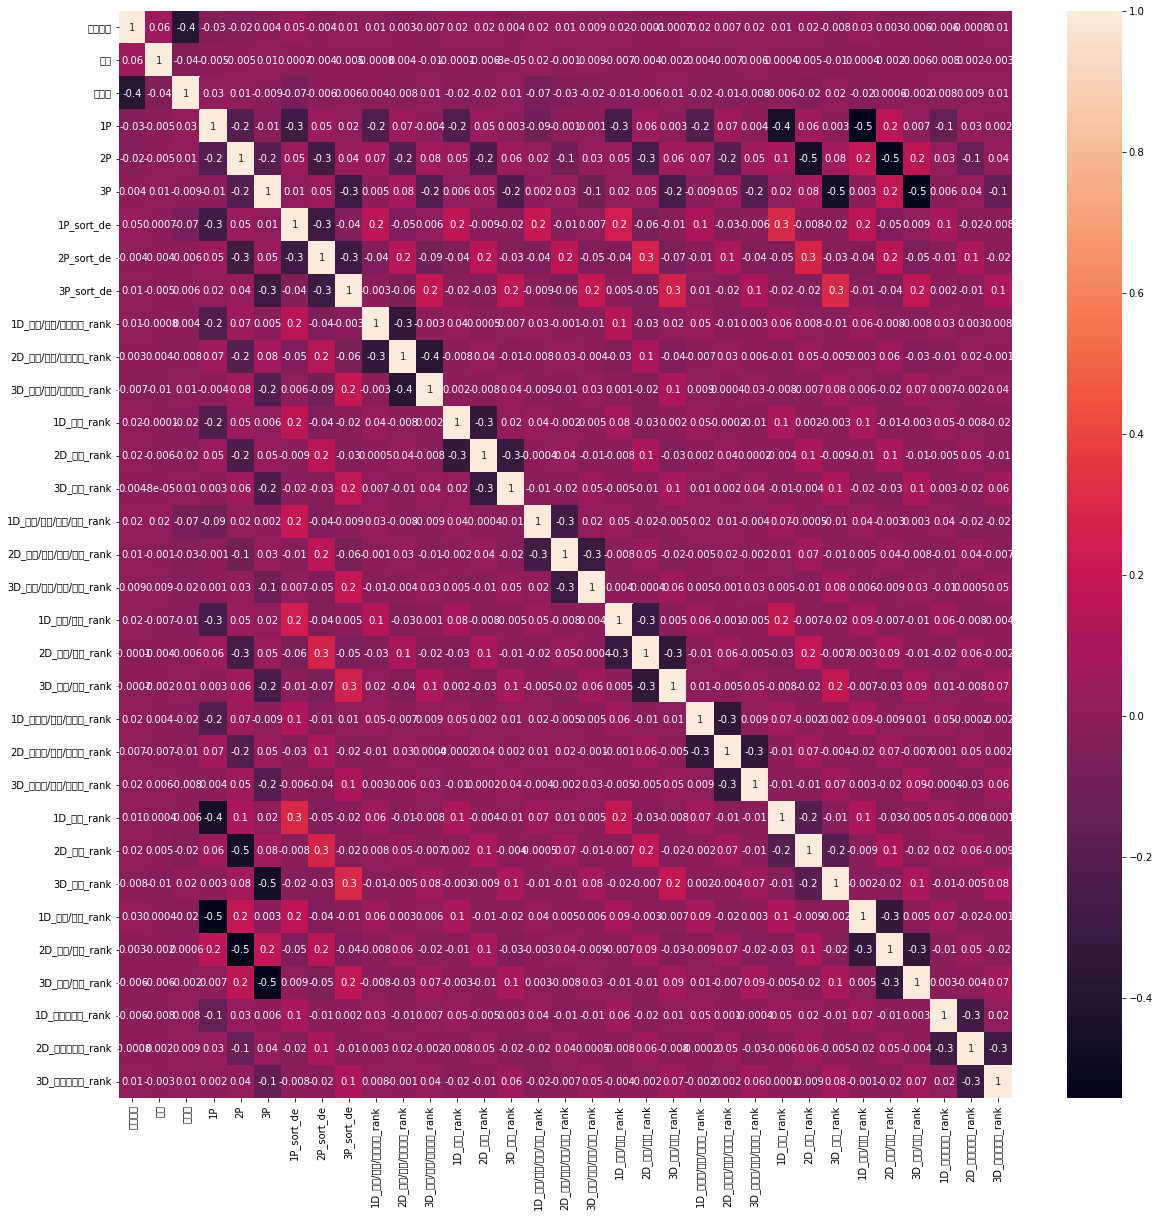

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(rank_df.corr(), annot=True, fmt='.1g')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

def modeling(data,model):

  y = data[['3P']]
  x = data.drop(['고객번호','3P','3D_가구/가전/전자기기_rank','3D_기타_rank','3D_반려/취미/문구/도서_rank','3D_생활/건강_rank','3D_스포츠/레저/자동차_rank','3D_식품_rank','3D_의류/잡화_rank','3D_출산유아동_rank','3P_sort_de'],axis=1)

  scaler = StandardScaler()

  new_x = scaler.fit_transform(x)

  X_train, X_test, y_train, y_test = train_test_split(new_x,y,test_size=0.2,random_state=0)


  if model == 'rf':  
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train,y_train)
    rf_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test,rf_pred)
    print(model,'정확도 : ',round(accuracy,2))

  elif model == 'lr':
    lr_clf = LogisticRegression()
    lr_clf.fit(X_train,y_train)
    lr_pred = lr_clf.predict(X_test)
    accuracy = accuracy_score(y_test,lr_pred)
    print(model,'정확도 : ',round(accuracy,2))

  elif model == 'xgb':
    xgb_clf = XGBClassifier()
    evals = [(X_test,y_test)]
    xgb_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    xgb_pred = xgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test,xgb_pred)
    print(model,'정확도 : ',round(accuracy,2))
  elif model == 'lgbm':
    lgbm_clf = LGBMClassifier()
    evals = [(X_test,y_test)]
    lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    lgbm_pred = lgbm_clf.predict(X_test)
    accuracy = accuracy_score(y_test,lgbm_pred)
    print(model,'정확도 : ',round(accuracy,2))

  else :
    print('모델 인자 값을 확인하세요')

In [ ]:
li = ['lr','rf','xgb','lgbm']
for i in li:
  modeling(rank_df,i)

lr 정확도 :  0.61
rf 정확도 :  0.6
xgb 정확도 :  0.61
lgbm 정확도 :  0.61
